# 4. Gradients in Python

Gradients are like derivatives, but for functions with multiple variables!
The gradient points in the direction of steepest ascent (biggest increase).
Think of it as a multi-dimensional slope!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


## 1. What is a Gradient?

For a function f(x, y), the gradient is: ∇f = [∂f/∂x, ∂f/∂y]
It's a vector that tells you the direction of steepest increase and how steep it is!


Point (x, y) | Function value | Gradient [∂f/∂x, ∂f/∂y]
-----------------------------------------------------------------
(0, 0)      | f =   0        | ∇f = [0.0, 0.0]
(1, 0)      | f =   1        | ∇f = [2.0, 0.0]
(1, 1)      | f =   2        | ∇f = [2.0, 2.0]
(2, 1)      | f =   5        | ∇f = [4.0, 2.0]


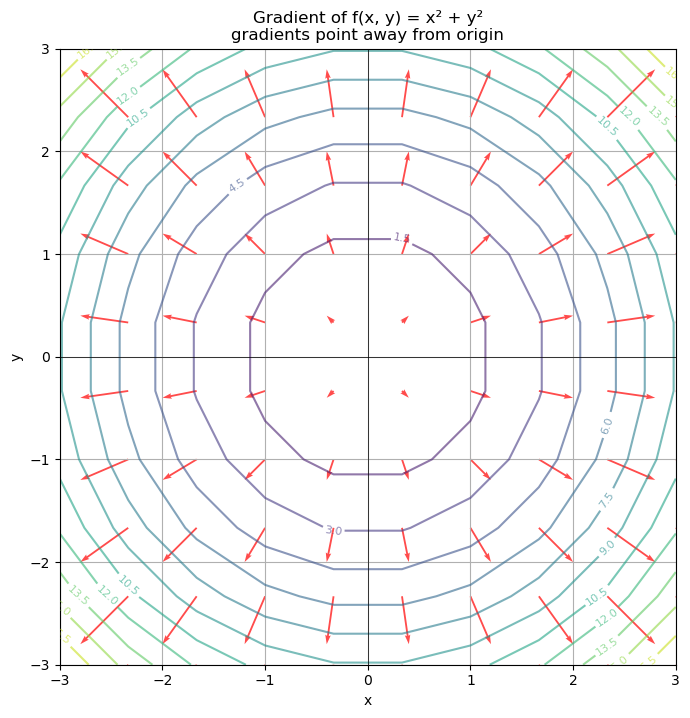

In [2]:
# Example: f(x, y) = x² + y²
# The gradient is: ∇f = [2x, 2y]
# At point (1, 1), the gradient is [2, 2]

def f(x, y):
    return x**2 + y**2

def gradient_f(x, y):
    """Gradient of f(x, y) = x² + y² is [2x, 2y]"""
    return np.array([2*x, 2*y])

# Check gradient at different points
points = [(0, 0), (1, 0), (1, 1), (2, 1)]
print("Point (x, y) | Function value | Gradient [∂f/∂x, ∂f/∂y]")
print("-" * 65)
for x, y in points:
    val = f(x, y)
    grad = gradient_f(x, y)
    print(f"({x}, {y})      | f = {val:3d}        | ∇f = [{grad[0]:3.1f}, {grad[1]:3.1f}]")

# Visualize gradient vectors
x = np.linspace(-3, 3, 10)
y = np.linspace(-3, 3, 10)
X, Y = np.meshgrid(x, y)

# Calculate gradients at each point (handle both scalar and array inputs)
U = 2 * X
V = 2 * Y

# Calculate function values for contour
Z = f(X, Y)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot contour lines
contour = ax.contour(X, Y, Z, levels=15, cmap='viridis', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)

# Plot gradient vectors
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, 
          color='r', width=0.003, alpha=0.7)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient of f(x, y) = x² + y²\ngradients point away from origin')
ax.set_aspect('equal')
ax.grid(True)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()


## 2. Simple Linear Function Gradient

For f(x, y) = 2x + 3y, the gradient is constant: ∇f = [2, 3]
This means the slope is the same everywhere!


Point (x, y) | Function value | Gradient
--------------------------------------------------
(  0,   0)   | f =   0      | ∇f = [2 3]
(  1,   1)   | f =   5      | ∇f = [2 3]
(  2,   0)   | f =   4      | ∇f = [2 3]
( -1,   2)   | f =   4      | ∇f = [2 3]


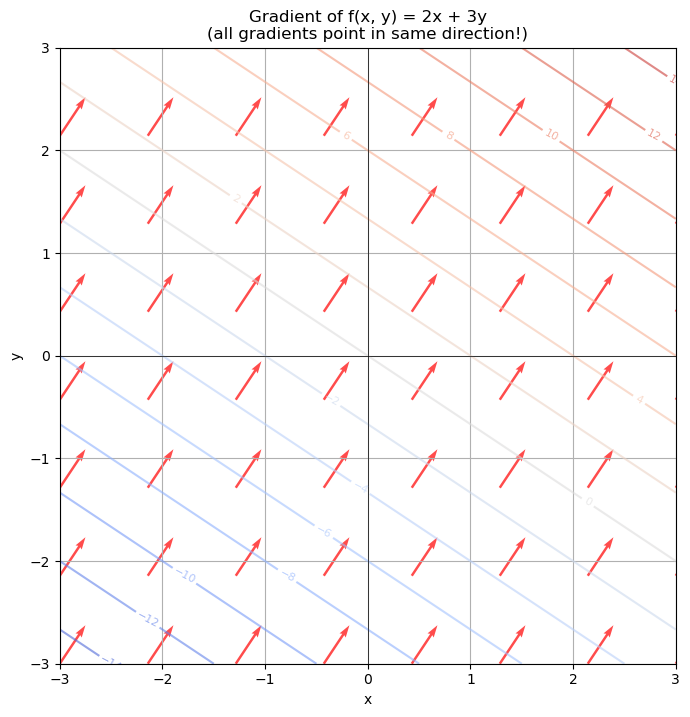

In [3]:
# Example: f(x, y) = 2x + 3y
# Gradient: ∇f = [2, 3] (constant everywhere!)

def f(x, y):
    return 2*x + 3*y

def gradient_f(x, y):
    """Gradient is always [2, 3]"""
    return np.array([2, 3])

# Check at different points
points = [(0, 0), (1, 1), (2, 0), (-1, 2)]
print("Point (x, y) | Function value | Gradient")
print("-" * 50)
for x, y in points:
    val = f(x, y)
    grad = gradient_f(x, y)
    print(f"({x:3d}, {y:3d})   | f = {val:3d}      | ∇f = {grad}")

# Visualize
x = np.linspace(-3, 3, 8)
y = np.linspace(-3, 3, 8)
X, Y = np.meshgrid(x, y)

# Gradient is constant
U = np.full_like(X, 2)
V = np.full_like(Y, 3)
Z = f(X, Y)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot contour lines
contour = ax.contour(X, Y, Z, levels=15, cmap='coolwarm', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)

# Plot gradient vectors (all pointing in same direction!)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=8, 
          color='r', width=0.004, alpha=0.7)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient of f(x, y) = 2x + 3y\n(all gradients point in same direction!)')
ax.set_aspect('equal')
ax.grid(True)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()


Point (x, y) | Function | Gradient    | Gradient Magnitude
-----------------------------------------------------------------
(0, 0)      | f =   0 | [0.0, 0.0] | |∇f| = 0.00
(1, 0)      | f =   1 | [2.0, 0.0] | |∇f| = 2.00
(1, 1)      | f =   2 | [2.0, 2.0] | |∇f| = 2.83
(2, 0)      | f =   4 | [4.0, 0.0] | |∇f| = 4.00
(2, 2)      | f =   8 | [4.0, 4.0] | |∇f| = 5.66


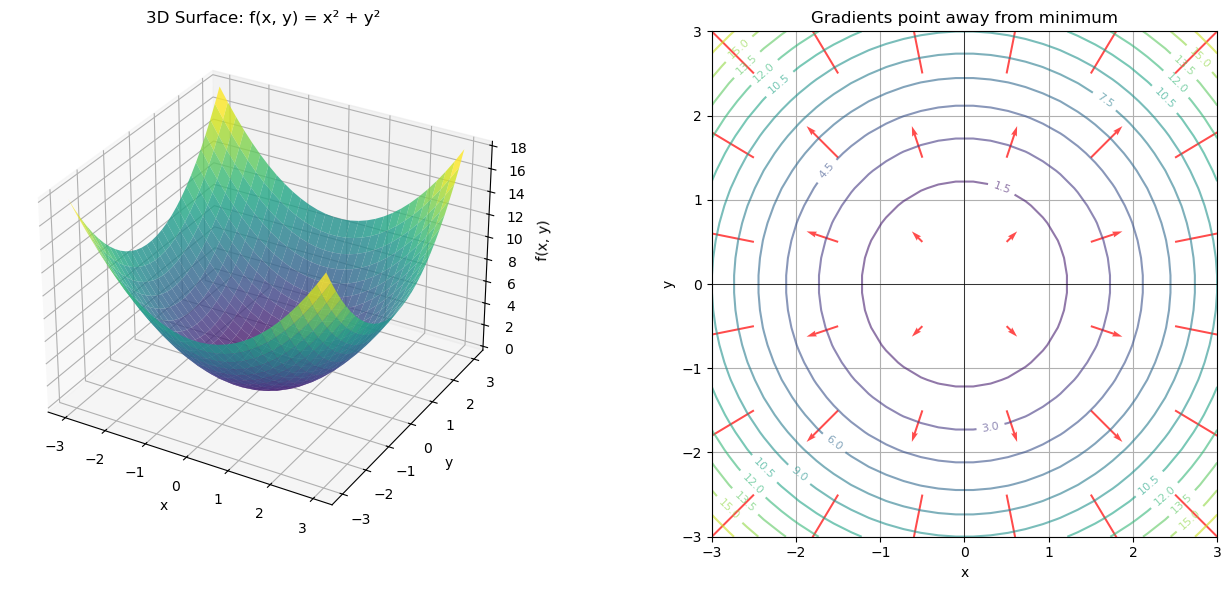

In [4]:
# Example: f(x, y) = x² + y² (bowl shape)
def f(x, y):
    return x**2 + y**2

def gradient_f(x, y):
    return np.array([2*x, 2*y])

# Calculate gradient magnitude
def gradient_magnitude(x, y):
    grad = gradient_f(x, y)
    return np.sqrt(grad[0]**2 + grad[1]**2)

# Check at different points
points = [(0, 0), (1, 0), (1, 1), (2, 0), (2, 2)]
print("Point (x, y) | Function | Gradient    | Gradient Magnitude")
print("-" * 65)
for x, y in points:
    val = f(x, y)
    grad = gradient_f(x, y)
    mag = gradient_magnitude(x, y)
    print(f"({x}, {y})      | f = {val:3d} | [{grad[0]:3.1f}, {grad[1]:3.1f}] | |∇f| = {mag:.2f}")

# Visualize with 3D surface
x = np.linspace(-3, 3, 30)
y = np.linspace(-3, 3, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Gradient vectors
x_grad = np.linspace(-2.5, 2.5, 6)
y_grad = np.linspace(-2.5, 2.5, 6)
X_grad, Y_grad = np.meshgrid(x_grad, y_grad)
U_grad = 2 * X_grad
V_grad = 2 * Y_grad

fig = plt.figure(figsize=(14, 6))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('3D Surface: f(x, y) = x² + y²')

# 2D contour with gradients
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=15, cmap='viridis', alpha=0.6)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.quiver(X_grad, Y_grad, U_grad, V_grad, angles='xy', scale_units='xy', scale=8, 
           color='r', width=0.004, alpha=0.7)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Gradients point away from minimum')
ax2.set_aspect('equal')
ax2.grid(True)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()


## 5. Gradient Direction: Steepest Ascent

The gradient always points in the direction of steepest increase!
Following the gradient = going uphill the fastest way.


At point (1, 1):
Function value: f(1, 1) = 2
Gradient: ∇f = [2, 2]

The gradient points in direction [2, 2]
This means: increase x by 2 AND y by 2 for steepest ascent!


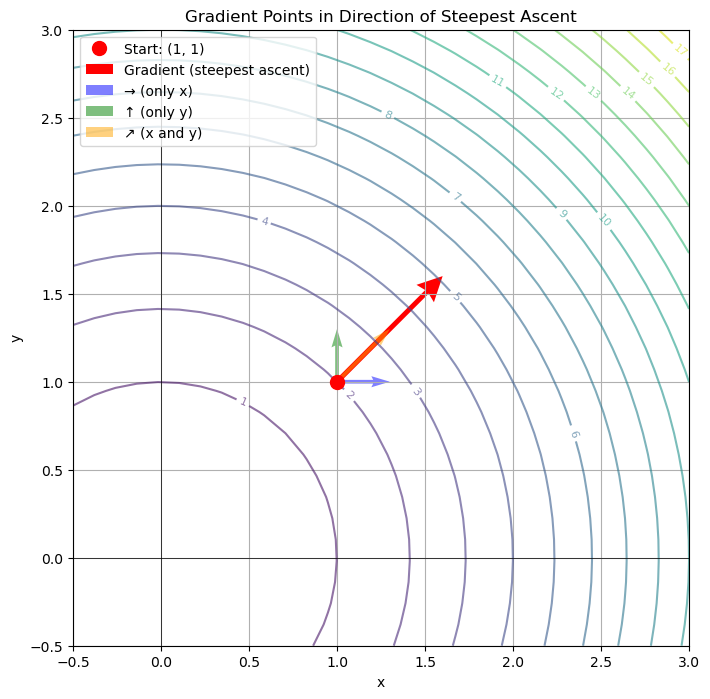


Notice: The gradient direction gives the steepest path uphill!


In [5]:
# Example: f(x, y) = x² + y²
# At point (1, 1), the gradient is [2, 2]
# This means: increase x AND y to go uphill fastest!

def f(x, y):
    return x**2 + y**2

def gradient_f(x, y):
    return np.array([2*x, 2*y])

# Starting point
x0, y0 = 1, 1
grad = gradient_f(x0, y0)

print(f"At point ({x0}, {y0}):")
print(f"Function value: f({x0}, {y0}) = {f(x0, y0)}")
print(f"Gradient: ∇f = [{grad[0]}, {grad[1]}]")
print(f"\nThe gradient points in direction [{grad[0]}, {grad[1]}]")
print(f"This means: increase x by {grad[0]} AND y by {grad[1]} for steepest ascent!")

# Visualize
x = np.linspace(-0.5, 3, 30)
y = np.linspace(-0.5, 3, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot contour
contour = ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)

# Mark starting point
ax.plot(x0, y0, 'ro', markersize=10, label=f'Start: ({x0}, {y0})')

# Draw gradient vector (scaled for visibility)
scale = 0.3
ax.quiver(x0, y0, grad[0]*scale, grad[1]*scale, 
          angles='xy', scale_units='xy', scale=1, 
          color='r', width=0.008, label='Gradient (steepest ascent)',
          headwidth=5, headlength=5)

# Show some other directions for comparison
directions = [
    ([1, 0], 'b', '→ (only x)'),
    ([0, 1], 'g', '↑ (only y)'),
    ([1, 1], 'orange', '↗ (x and y)'),
]

for dir_vec, color, label in directions:
    ax.quiver(x0, y0, dir_vec[0]*scale, dir_vec[1]*scale,
               angles='xy', scale_units='xy', scale=1,
               color=color, width=0.006, alpha=0.5, label=label)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Points in Direction of Steepest Ascent')
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

print("\nNotice: The gradient direction gives the steepest path uphill!")


## 6. Negative Gradient: Steepest Descent

The negative gradient (-∇f) points in the direction of steepest decrease!
Following -∇f = going downhill the fastest way. Used in optimization!


At point (2, 1):
Function value: f(2, 1) = 5
Gradient (uphill): ∇f = [4, 2]
Negative gradient (downhill): -∇f = [-4, -2]

Following -∇f takes us toward the minimum at (0, 0)!


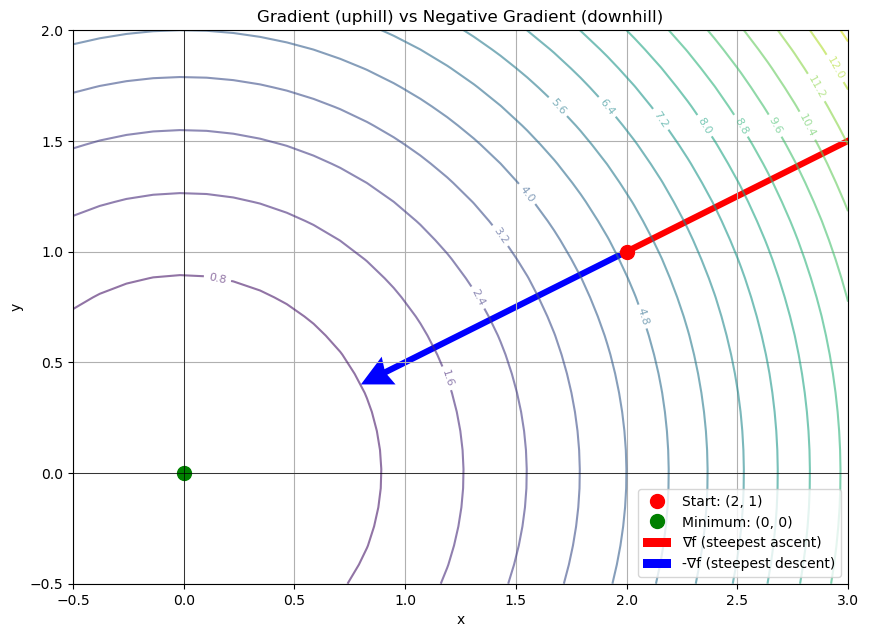


Following -∇f (negative gradient) finds the minimum!
This is the idea behind gradient descent optimization!


In [6]:
# Example: f(x, y) = x² + y²
# At point (2, 1), gradient is [4, 2] (points uphill)
# Negative gradient is [-4, -2] (points downhill to minimum)

def f(x, y):
    return x**2 + y**2

def gradient_f(x, y):
    return np.array([2*x, 2*y])

# Starting point
x0, y0 = 2, 1
grad = gradient_f(x0, y0)
neg_grad = -grad

print(f"At point ({x0}, {y0}):")
print(f"Function value: f({x0}, {y0}) = {f(x0, y0)}")
print(f"Gradient (uphill): ∇f = [{grad[0]}, {grad[1]}]")
print(f"Negative gradient (downhill): -∇f = [{neg_grad[0]}, {neg_grad[1]}]")
print(f"\nFollowing -∇f takes us toward the minimum at (0, 0)!")

# Visualize
x = np.linspace(-0.5, 3, 30)
y = np.linspace(-0.5, 2, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot contour
contour = ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)

# Mark starting point and minimum
ax.plot(x0, y0, 'ro', markersize=10, label=f'Start: ({x0}, {y0})')
ax.plot(0, 0, 'go', markersize=10, label='Minimum: (0, 0)')

# Draw gradient (uphill)
scale = 0.3
ax.quiver(x0, y0, grad[0]*scale, grad[1]*scale,
          angles='xy', scale_units='xy', scale=1,
          color='r', width=0.008, label='∇f (steepest ascent)',
          headwidth=5, headlength=5)

# Draw negative gradient (downhill)
ax.quiver(x0, y0, neg_grad[0]*scale, neg_grad[1]*scale,
          angles='xy', scale_units='xy', scale=1,
          color='b', width=0.008, label='-∇f (steepest descent)',
          headwidth=5, headlength=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient (uphill) vs Negative Gradient (downhill)')
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

print("\nFollowing -∇f (negative gradient) finds the minimum!")
print("This is the idea behind gradient descent optimization!")


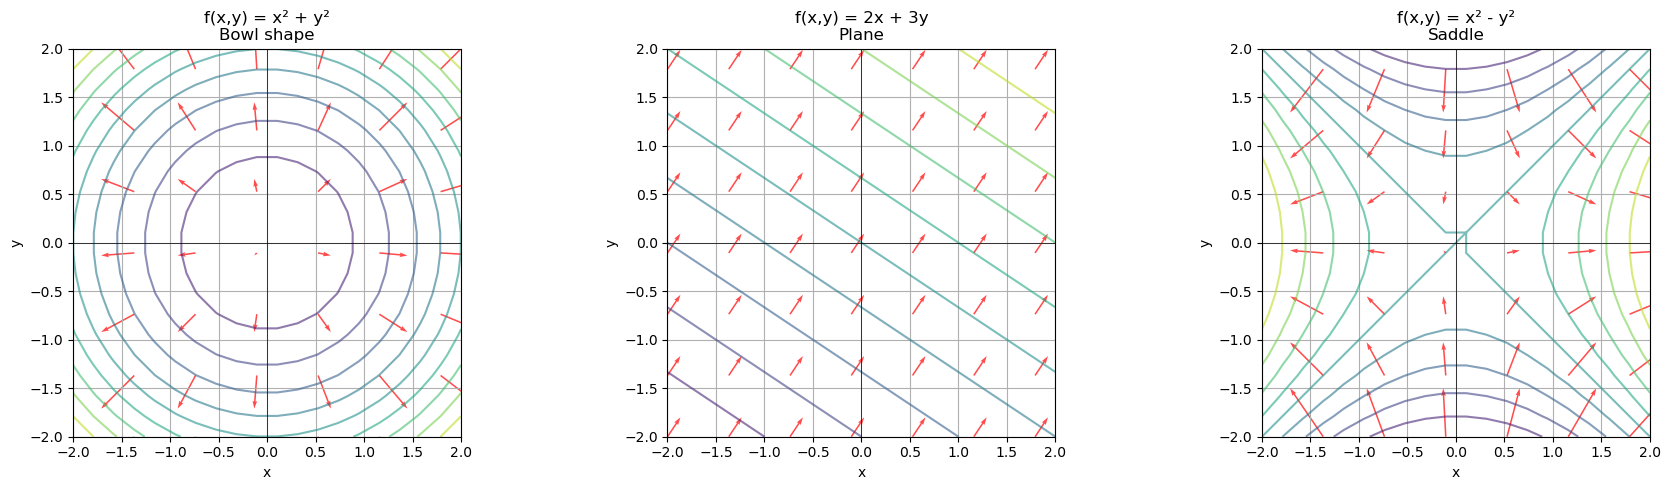


Notice how gradients point in different directions for different functions!


In [7]:
# Compare different functions
x_plot = np.linspace(-2, 2, 20)
y_plot = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_plot, y_plot)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Function 1: f(x,y) = x² + y²
Z1 = X**2 + Y**2
U1 = 2 * X
V1 = 2 * Y

# Function 2: f(x,y) = 2x + 3y
Z2 = 2*X + 3*Y
U2 = np.full_like(X, 2)
V2 = np.full_like(Y, 3)

# Function 3: f(x,y) = x² - y²
Z3 = X**2 - Y**2
U3 = 2 * X
V3 = -2 * Y

functions = [
    (Z1, U1, V1, 'f(x,y) = x² + y²', 'Bowl shape', 8),
    (Z2, U2, V2, 'f(x,y) = 2x + 3y', 'Plane', 15),
    (Z3, U3, V3, 'f(x,y) = x² - y²', 'Saddle', 8),
]

for idx, (Z, U, V, title, desc, scale) in enumerate(functions):
    # Subsample for cleaner visualization
    step = 3
    X_sub = X[::step, ::step]
    Y_sub = Y[::step, ::step]
    U_sub = U[::step, ::step]
    V_sub = V[::step, ::step]
    
    # Plot contour
    contour = axes[idx].contour(X, Y, Z, levels=10, cmap='viridis', alpha=0.6)
    
    # Plot gradient vectors
    axes[idx].quiver(X_sub, Y_sub, U_sub, V_sub, 
                     angles='xy', scale_units='xy', scale=scale,
                     color='r', width=0.004, alpha=0.7)
    
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    axes[idx].set_title(f'{title}\n{desc}')
    axes[idx].set_aspect('equal')
    axes[idx].grid(True)
    axes[idx].axhline(y=0, color='k', linewidth=0.5)
    axes[idx].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\nNotice how gradients point in different directions for different functions!")


## 8. Key Takeaways

**What gradients are:**
- Multivariable generalization of derivatives
- Vector of partial derivatives: ∇f = [∂f/∂x, ∂f/∂y]
- Points in direction of steepest increase

**Important properties:**
- **Direction**: Points where function increases fastest
- **Magnitude**: How steep the increase is
- **Negative gradient**: Points where function decreases fastest
- **At minimum/maximum**: Gradient = [0, 0] (flat point)

**Key operations:**
- **Gradient of f(x, y)**: ∇f = [∂f/∂x, ∂f/∂y]
- **Gradient magnitude**: |∇f| = √((∂f/∂x)² + (∂f/∂y)²)
- **Steepest ascent**: Follow ∇f
- **Steepest descent**: Follow -∇f

**Remember:** Gradients show you the "slope" in multi-dimensional space!
